# Práctica Final: Clasificación con Scikit-learn y MLflow

En esta práctica, utilizarás un conjunto de datos de Scikit-learn (podeís usar el mismo que en el notebook de Intro MLFlow) para entrenar un modelo de clasificación.

Pasos a seguir: 

    Exploración de Datos: Analiza el conjunto de datos proporcionado para comprender su estructura y contenido.

    Preprocesamiento de Texto: Realiza tareas de preprocesamiento de texto, como tokenización y vectorización, para preparar los datos para el modelado.

    Entrenamiento del Modelo: Utiliza algoritmos de clasificación de Scikit-learn para entrenar un modelo con los datos preprocesados.

    Evaluación del Modelo: Evalúa el rendimiento del modelo utilizando métricas de evaluación estándar como precisión y recall.

    Registro de Métricas con MLflow: Utiliza MLflow para registrar métricas y hiperparámetros durante el entrenamiento, facilitando la gestión y comparación de experimentos.


Nota: Dado que no voy a poder tener acceso a vuestros logs de MLFlow añadirme las imagenes de la interfaz de MLFlow en el notebook

## Importamos las librerias necesarias para ejecutar el notebook

In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: C:\Users\lechu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
!pip install mlflow

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: C:\Users\lechu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [23]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [5]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [7]:
df['target'] = cancer['target']
df.head().T

,0,1,2,3,4
mean radius,17.990000,20.570000,19.690000,11.420000,20.290000
mean texture,10.380000,17.770000,21.250000,20.380000,14.340000
mean perimeter,122.800000,132.900000,130.000000,77.580000,135.100000
mean area,1001.000000,1326.000000,1203.000000,386.100000,1297.000000
mean smoothness,0.118400,0.084740,0.109600,0.142500,0.100300
mean compactness,0.277600,0.078640,0.159900,0.283900,0.132800
mean concavity,0.300100,0.086900,0.197400,0.241400,0.198000
mean concave points,0.147100,0.070170,0.127900,0.105200,0.104300
mean symmetry,0.241900,0.181200,0.206900,0.259700,0.180900
mean fractal dimension,0.078710,0.056670,0.059990,0.097440,0.058830


In [8]:
df.shape

(569, 31)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# Análisis de Datos con Scikit-Learn

En este código, se realiza un análisis de datos utilizando el conjunto de datos de cáncer de mama proporcionado por Scikit-Learn. Aquí hay una breve descripción de las operaciones realizadas:

1. **Carga del Conjunto de Datos:**
   - Se carga el conjunto de datos de cáncer de mama utilizando la función `load_breast_cancer` de Scikit-Learn.

2. **Creación de un DataFrame:**
   - Se crea un DataFrame utilizando los datos del conjunto de datos, asignando las características a las columnas y la variable objetivo ('target') a una columna adicional.

3. **Visualización de los Primeros Registros:**
   - Se muestra una vista previa de los primeros registros del DataFrame para obtener una comprensión inicial de los datos.

4. **Dimensiones del DataFrame:**
   - Se imprime la forma del DataFrame para conocer el número de filas y columnas en los datos.

5. **Estadísticas Descriptivas:**
   - Se proporcionan estadísticas descriptivas del DataFrame, incluyendo conteos, medias, desviaciones estándar, mínimos y máximos.

6. **Nombres de Columnas:**
   - Se muestran los nombres de las columnas presentes en el DataFrame.

Este código sirve como punto de partida para explorar y comprender el conjunto de datos de cáncer de mama, y para realizar análisis estadísticos básicos sobre sus características y variable objetivo.


In [11]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [12]:

train, test = train_test_split(df, test_size=0.2)

In [13]:
test_target = test['target']
test[['target']].to_csv('test-target.csv', index=False)
del test['target']
test.to_csv('test.csv', index=False)

In [14]:
features = [x for x in list(train.columns) if x != 'target']
x_raw = train[features]
y_raw = train['target']

In [17]:
features = [x for x in list(train.columns) if x != 'target']
x_raw = train[features]
y_raw = train['target']

x_train, x_test, y_train, y_test = train_test_split(x_raw, y_raw,
                                                            test_size=.20,
                                                            random_state=123,
                                                            stratify=y_raw)

In [36]:
# Configurar GradientBoostingClassifier
clf = GradientBoostingClassifier(
    n_estimators=25,
    learning_rate=0.1,
    max_depth=3,
    random_state=32
)

# Preprocesamiento
preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

# Pipeline final con GradientBoostingClassifier
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('GradientBoostingClassifier', clf)])


In [37]:
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('GradientBoostingClassifier',
                 GradientBoostingClassifier(n_estimators=25, random_state=32))])

# Entrenamiento de un Modelo con Scikit-Learn

En estas líneas de código, se lleva a cabo el proceso de entrenamiento de un modelo de clasificación utilizando Scikit-Learn. Aquí se presenta una descripción resumida de las operaciones realizadas:

1. **División del Conjunto de Datos:**
   - El conjunto de datos original se divide en conjuntos de entrenamiento (train) y prueba (test) utilizando la función `train_test_split`.

2. **Preparación del Conjunto de Prueba:**
   - Se extrae la variable objetivo del conjunto de prueba y se guarda en un archivo CSV llamado 'test-target.csv'. Luego, se elimina la variable objetivo del conjunto de prueba y se guarda en otro archivo CSV llamado 'test.csv'.

3. **División del Conjunto de Entrenamiento:**
   - El conjunto de entrenamiento se divide en subconjuntos de entrenamiento y prueba utilizando la función `train_test_split` nuevamente.

4. **Configuración del Modelo:**
   - Se configura un modelo de clasificación utilizando el algoritmo Gradient Boosting Classifier con parámetros específicos.

5. **Preprocesamiento y Entrenamiento del Modelo:**
   - Se utiliza un preprocesador que incluye un escalador estándar (StandardScaler) dentro de una tubería (Pipeline).
   - El modelo (Gradient Boosting Classifier) se incluye también en una tubería.
   - La tubería completa se entrena con el conjunto de entrenamiento.

En resumen, estas líneas de código representan el proceso de preparación de datos, configuración y entrenamiento de un modelo de clasificación utilizando Gradient Boosting Classifier en Scikit-Learn.


In [38]:
accuracy_train = model.score(x_train, y_train)
accuracy_train

1.0

In [39]:
accuracy_test = model.score(x_test, y_test)

In [40]:
# Obtener las predicciones en el conjunto de prueba
y_test_pred = model.predict(x_test)

# Calcular precision y recall
precision_test = precision_score(y_test, y_test_pred, average='weighted')  # Ajusta el promedio según el caso
recall_test = recall_score(y_test, y_test_pred, average='weighted')        # 'weighted' funciona bien para clases desbalanceadas

print(f"Precision (Test): {precision_test}")
print(f"Recall (Test): {recall_test}")


Precision (Test): 0.9340659340659341
Recall (Test): 0.9340659340659341


In [41]:
model.get_params()

{'memory': None,
 'steps': [('preprocessor', Pipeline(steps=[('scaler', StandardScaler())])),
  ('GradientBoostingClassifier',
   GradientBoostingClassifier(n_estimators=25, random_state=32))],
 'verbose': False,
 'preprocessor': Pipeline(steps=[('scaler', StandardScaler())]),
 'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=25, random_state=32),
 'preprocessor__memory': None,
 'preprocessor__steps': [('scaler', StandardScaler())],
 'preprocessor__verbose': False,
 'preprocessor__scaler': StandardScaler(),
 'preprocessor__scaler__copy': True,
 'preprocessor__scaler__with_mean': True,
 'preprocessor__scaler__with_std': True,
 'GradientBoostingClassifier__ccp_alpha': 0.0,
 'GradientBoostingClassifier__criterion': 'friedman_mse',
 'GradientBoostingClassifier__init': None,
 'GradientBoostingClassifier__learning_rate': 0.1,
 'GradientBoostingClassifier__loss': 'log_loss',
 'GradientBoostingClassifier__max_depth': 3,
 'GradientBoostingClassifier__max_features': None,
 '

In [42]:
# Registrar en MLflow
mlflow.set_experiment('Cancer Classifier with Accuracy IA2')

with mlflow.start_run(run_name='Primer entrenamiento con Random state 32'):
    # Registrar todos los hiperparámetros del modelo dinámicamente
    for param, value in model.get_params().items():
        mlflow.log_param(param, value)

    # Registrar métricas
    mlflow.log_metric('accuracy_train', accuracy_train)
    mlflow.log_metric('accuracy_test', accuracy_test)
    mlflow.log_metric('precision_test', precision_test)
    mlflow.log_metric('recall_test', recall_test)
    
    # Registrar el modelo
    mlflow.sklearn.log_model(model, 'clf')

print("Entrenamiento completado y métricas registradas en MLflow.")


2024/12/17 00:12:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Entrenamiento completado y métricas registradas en MLflow.


In [27]:
#!mlflow ui

^C


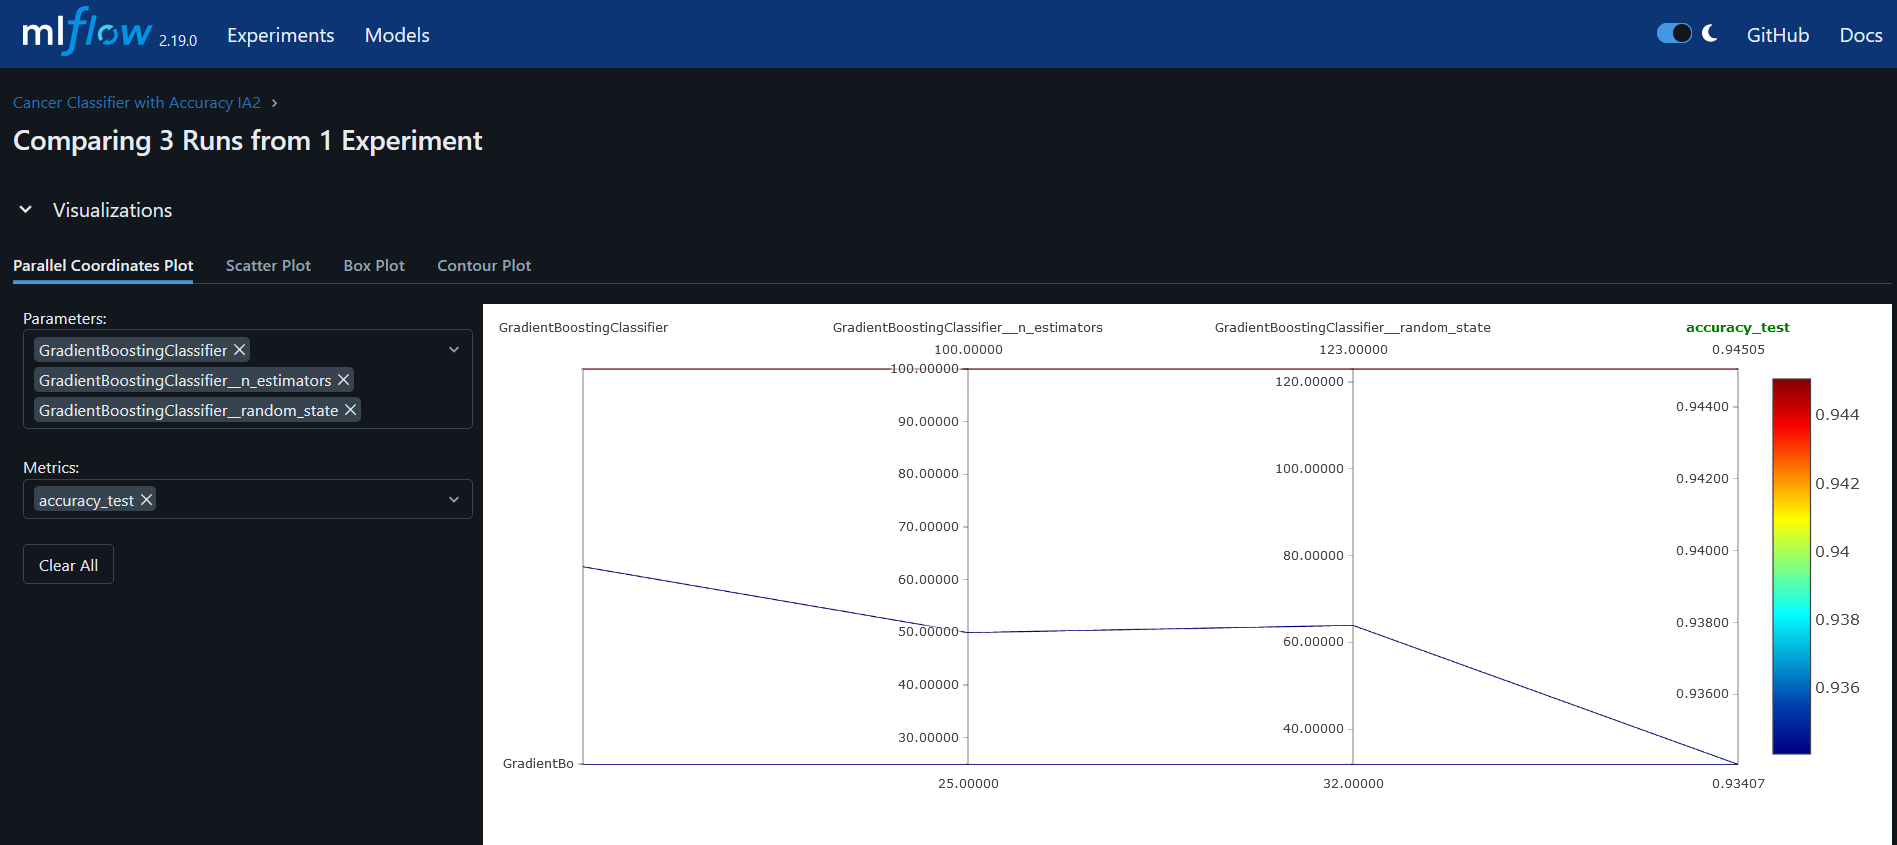

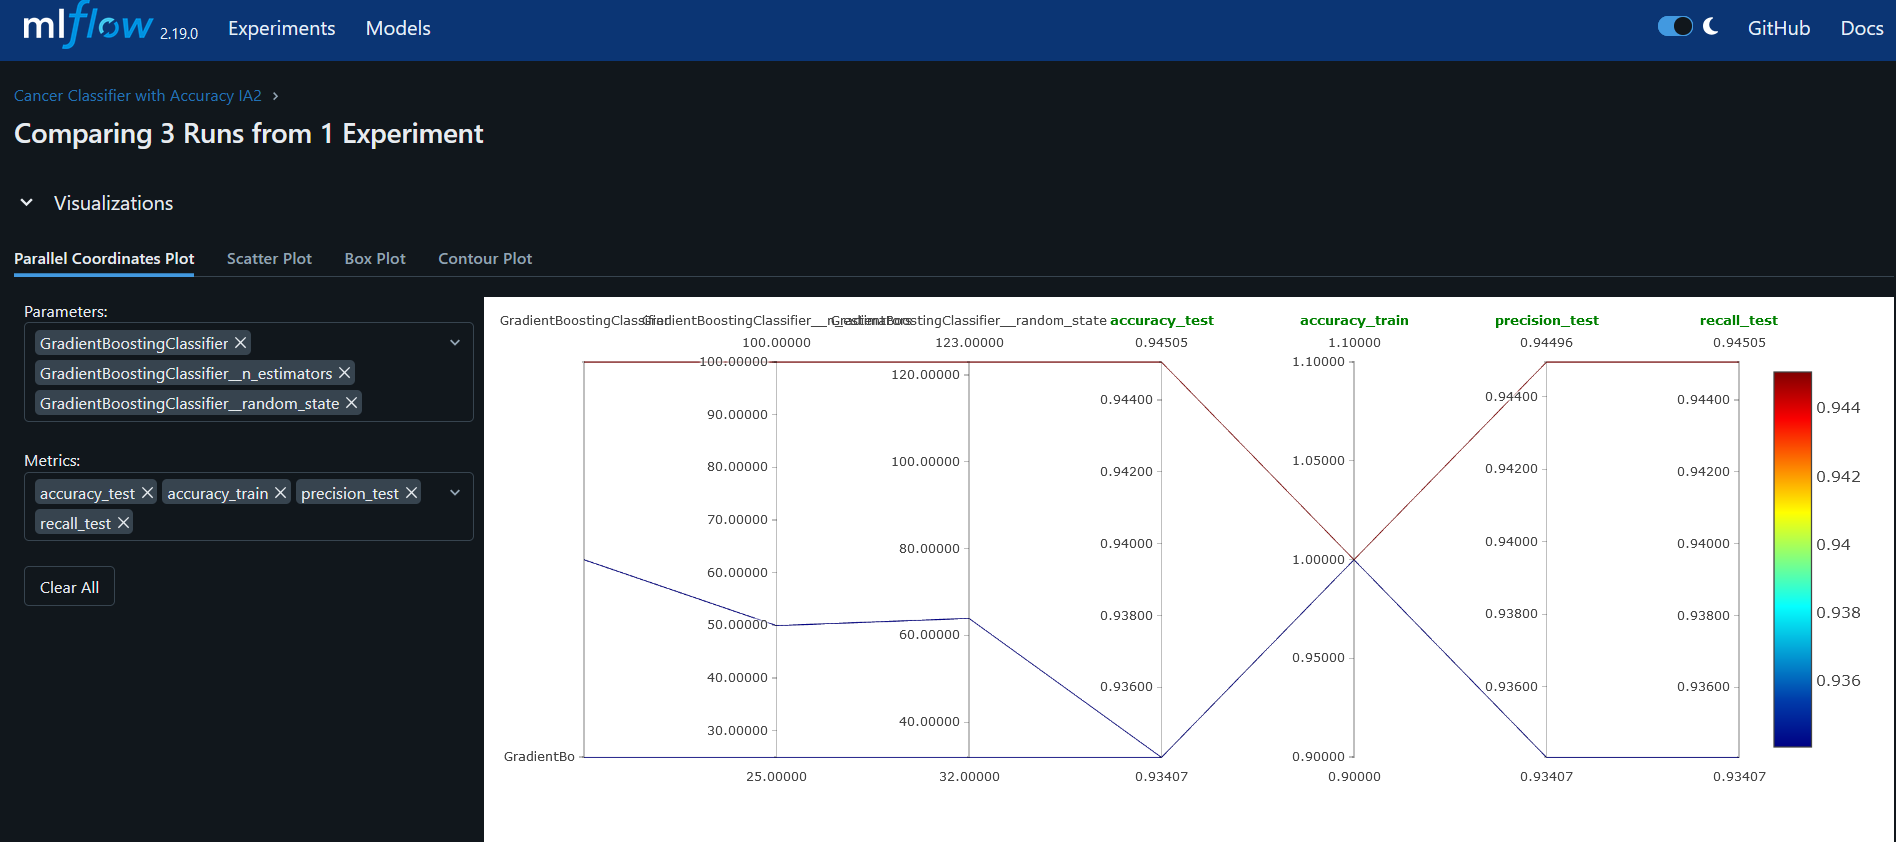

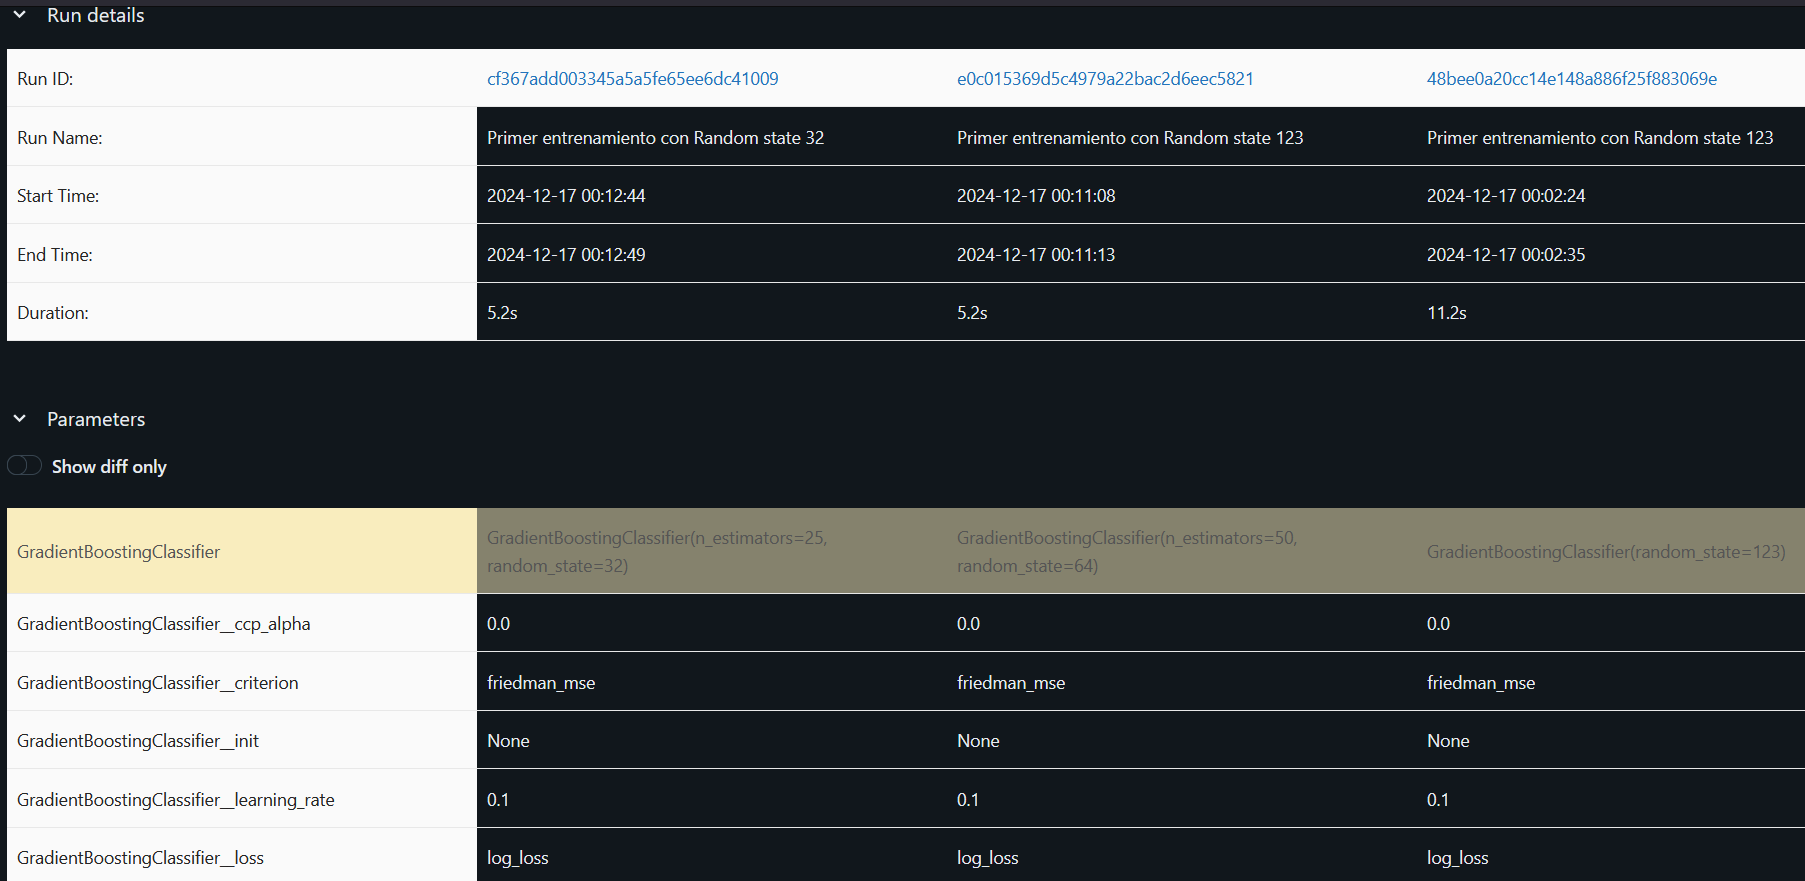

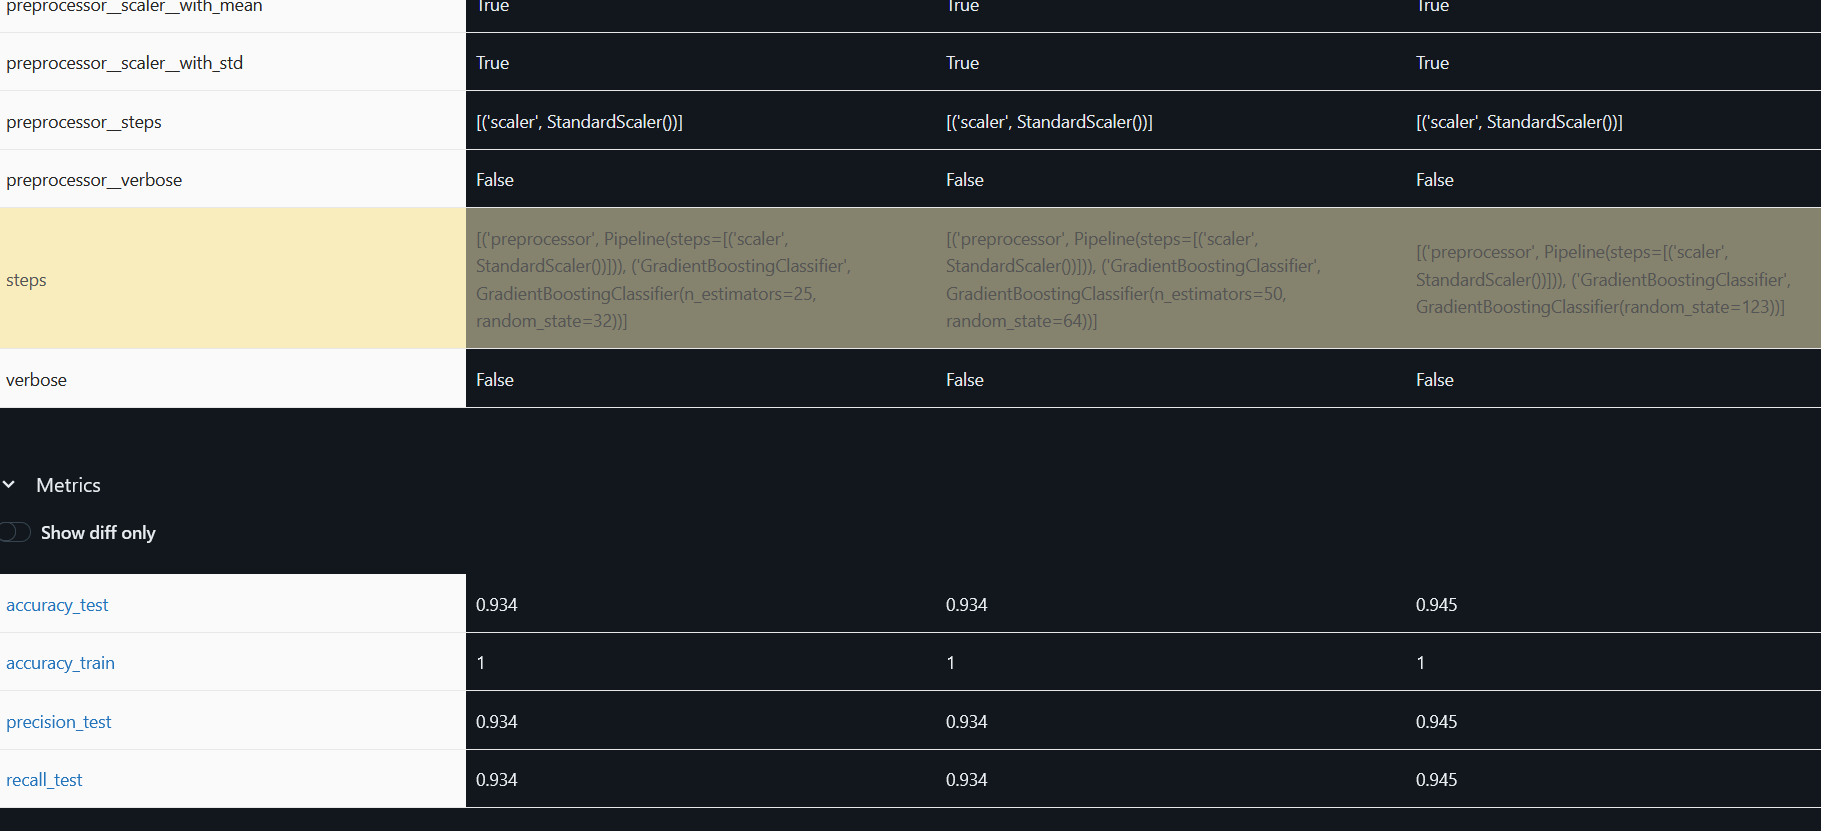

In [44]:
from IPython.display import Image, display

# Lista de nombres de archivos
image_files = [
    'Captura de pantalla mlflow 01.png',
    'Captura de pantalla mlflow 02.png',
    'Captura de pantalla mlflow 03.png',
    'Captura de pantalla mlflow 04.png'
]

# Mostrar todas las imágenes
for img_file in image_files:
    img = Image(filename=img_file)
    display(img)


## Generar .py de funciones y main con al menos dos argumentos de entrada.

In [ ]:
# funciones.py
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']

train, test = train_test_split(df, test_size=0.2)
test_target = test['target']
test[['target']].to_csv('test-target.csv', index=False)
del test['target']
test.to_csv('test.csv', index=False)

features = [x for x in list(train.columns) if x != 'target']
x_raw = train[features]
y_raw = train['target']

features = [x for x in list(train.columns) if x != 'target']
x_raw = train[features]
y_raw = train['target']

x_train, x_test, y_train, y_test = train_test_split(x_raw, y_raw,
                                                            test_size=.20,
                                                            random_state=123,
                                                            stratify=y_raw)

n_stimators = [2,10,20,30,50,80,100,130]

mlflow_ui_process = subprocess.Popen(['mlflow', 'ui', '--port', '5000'])

# Configurar GradientBoostingClassifier
clf = GradientBoostingClassifier(
    n_estimators=25,
    learning_rate=0.1,
    max_depth=3,
    random_state=32
)

# Preprocesamiento
preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

# Pipeline final con GradientBoostingClassifier
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('GradientBoostingClassifier', clf)])

model.fit(x_train, y_train)


accuracy_train = model.score(x_train, y_train)
accuracy_train

accuracy_test = model.score(x_test, y_test)

# Obtener las predicciones en el conjunto de prueba
y_test_pred = model.predict(x_test)

# Calcular precision y recall
precision_test = precision_score(y_test, y_test_pred, average='weighted')  # Ajusta el promedio según el caso
recall_test = recall_score(y_test, y_test_pred, average='weighted')        # 'weighted' funciona bien para clases desbalanceadas

print(f"Precision (Test): {precision_test}")
print(f"Recall (Test): {recall_test}")

model.get_params()

# Registrar en MLflow
mlflow.set_experiment('Cancer Classifier with Accuracy IA2')

with mlflow.start_run(run_name='Primer entrenamiento con Random state 32'):
    # Registrar todos los hiperparámetros del modelo dinámicamente
    for param, value in model.get_params().items():
        mlflow.log_param(param, value)

    # Registrar métricas
    mlflow.log_metric('accuracy_train', accuracy_train)
    mlflow.log_metric('accuracy_test', accuracy_test)
    mlflow.log_metric('precision_test', precision_test)
    mlflow.log_metric('recall_test', recall_test)
    
    # Registrar el modelo
    mlflow.sklearn.log_model(model, 'clf')

print("Entrenamiento completado y métricas registradas en MLflow.")


In [ ]:
import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import subprocess
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.datasets import load_breast_cancer

def load_dataset():
    """Carga el dataset de cáncer de mama"""
    cancer = load_breast_cancer()
    df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
    df['target'] = cancer['target']
    return df

def data_treatment(df):
    """Divide el dataset en conjuntos de entrenamiento y prueba"""
    # Split data into train and test sets
    train, test = train_test_split(df, test_size=0.2)
    test_target = test['target']
    test[['target']].to_csv('test-target.csv', index=False)
    del test['target']
    test.to_csv('test.csv', index=False)

    features = [x for x in list(train.columns) if x != 'target']
    x_raw = train[features]
    y_raw = train['target']
    x_train, x_test, y_train, y_test = train_test_split(x_raw, y_raw,
                                                        test_size=.20,
                                                        random_state=123,
                                                        stratify=y_raw)
    return x_train, x_test, y_train, y_test

def mlflow_tracking(nombre_job, x_train, x_test, y_train, y_test, n_estimators):
    """Entrenamiento y seguimiento con MLflow"""
    mlflow_ui_process = subprocess.Popen(['mlflow', 'ui', '--port', '5000'])
    print(mlflow_ui_process)
    time.sleep(5)
    mlflow.set_experiment(nombre_job)
    
    for i in n_estimators:
        with mlflow.start_run() as run:
            clf = GradientBoostingClassifier(n_estimators=i,
                                             learning_rate=0.1,
                                             max_depth=3,
                                             random_state=123)

            preprocessor = Pipeline(steps=[('scaler', StandardScaler())])

            model = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('GradientBoostingClassifier', clf)])
            model.fit(x_train, y_train)
            
            # Calcular las métricas
            accuracy_train = model.score(x_train, y_train)
            accuracy_test = model.score(x_test, y_test)

            # Obtener las predicciones en el conjunto de prueba
            y_test_pred = model.predict(x_test)

            # Calcular precision y recall
            precision_test = precision_score(y_test, y_test_pred, average='weighted')
            recall_test = recall_score(y_test, y_test_pred, average='weighted')

            # Registrar en MLflow
            mlflow.log_metric('accuracy_train', accuracy_train)
            mlflow.log_metric('accuracy_test', accuracy_test)
            mlflow.log_metric('precision_test', precision_test)
            mlflow.log_metric('recall_test', recall_test)
            mlflow.log_param('n_estimators', i)
            mlflow.sklearn.log_model(model, 'clf-model')
            
    print("Se ha acabado el entrenamiento del modelo correctamente")


In [ ]:
from funciones import load_dataset, data_treatment, mlflow_tracking

def main():
    # Cargar el dataset
    df = load_dataset()

    # Preparar los datos de entrenamiento y prueba
    x_train, x_test, y_train, y_test = data_treatment(df)

    # Lista de valores para n_estimators que quieres probar
    n_estimators = [2, 10, 20, 30, 50, 80, 100, 130]

    # Nombre del trabajo para MLflow
    nombre_job = 'Cancer Classifier with Gradient Boosting'

    # Llamar a la función de seguimiento y entrenamiento
    mlflow_tracking(nombre_job, x_train, x_test, y_train, y_test, n_estimators)

if __name__ == "__main__":
    main()


## Práctica parte FastAPI

### Para esta parte de la práctica teneis que generar un script con al menos 5 modulos app.get y dos de ellos tienen que ser pipelines de HF. 

### Parte de la practica se tendra que entregar en capturas de pantalla. Las capturas de pantalla a adjuntas son las siguientes. 

### 1. Captura de la pantalla docs con al menos 5 modulos. 
### 2. Captura de cada una de los modulos con la respuesta dentro de docs. 
### 3. Captura de cada uno de los modulos en la llamada https.
### 4. Todo el codigo usado durante el proceso. Notebooks y scripts.

### Opcional

### 5. Despliegue del script en GCP Cloud Run